# *Импорт необходимых библиотек*

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# *Загрузка и предобработка данных*

In [2]:
# Загрузка CIFAR-10 датасета
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормализация пиксельных значений изображений до диапазона от 0 до 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# *Создание модели для 10 классов*

In [3]:
# Создание сверточной нейронной сети для 10 классов
model_10_classes = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 классов
])

# *Компиляция модели для 10 классов*

In [4]:
model_10_classes.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])

# *Обучение модели для 10 классов и визуализация результатов*

In [5]:
# Определение размера подмножества для обучения и валидации
subset_size = 10000

# Использование только части данных
subset_train_images = train_images[:subset_size]
subset_train_labels = train_labels[:subset_size]
subset_test_images = test_images[:subset_size]
subset_test_labels = test_labels[:subset_size]

# Обучение модели
history_10_classes = model_10_classes.fit(subset_train_images, subset_train_labels, epochs=10, 
                                          validation_data=(subset_test_images, subset_test_labels))

# Визуализация результатов
plt.plot(history_10_classes.history['accuracy'], label='accuracy')
plt.plot(history_10_classes.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Оценка точности на тестовом наборе
test_loss_10, test_acc_10 = model_10_classes.evaluate(subset_test_images, subset_test_labels, verbose=2)
print("Accuracy for 10 classes:", test_acc_10)

Epoch 1/10
313/313 [==============================] - 5s 14ms/step - loss: 1.8784 - accuracy: 0.2960 - val_loss: 1.6530 - val_accuracy: 0.3996
Epoch 2/10
313/313 [==============================] - 4s 13ms/step - loss: 1.5167 - accuracy: 0.4446 - val_loss: 1.4143 - val_accuracy: 0.4829
Epoch 3/10
313/313 [==============================] - 4s 13ms/step - loss: 1.3649 - accuracy: 0.5057 - val_loss: 1.3604 - val_accuracy: 0.5086
Epoch 4/10
313/313 [==============================] - 4s 13ms/step - loss: 1.2821 - accuracy: 0.5375 - val_loss: 1.2776 - val_accuracy: 0.5407
Epoch 5/10
313/313 [==============================] - 4s 14ms/step - loss: 1.1900 - accuracy: 0.5688 - val_loss: 1.3350 - val_accuracy: 0.5105
Epoch 6/10
313/313 [==============================] - 4s 14ms/step - loss: 1.1087 - accuracy: 0.6059 - val_loss: 1.1899 - val_accuracy: 0.5817
Epoch 7/10
313/313 [==============================] - 4s 14ms/step - loss: 1.0407 - accuracy: 0.6285 - val_loss: 1.2455 - val_accuracy: 0.5675

313/313 - 1s - loss: 1.1529 - accuracy: 0.6092 - 1s/epoch - 4ms/step
Accuracy for 10 classes: 0.6092000007629395


## **ВНИМАНИЕ!**

Я столкнулся с ошибкой MemoryError при попытке обучить модель на полном наборе данных CIFAR-10.

Для решения этой проблемы и продолжения работы над проектом, я принял решение использовать только часть данных для обучения и валидации модели. Конкретно, я использовал первые 10000 образцов из обучающего и тестового наборов. Этот подход позволил снизить нагрузку на оперативную память и успешно обучить модель, несмотря на ограничения системы.

Однако стоит отметить, что такое сокращение объема данных может повлиять на обобщающую способность модели, поскольку она обучается на менее разнообразном наборе образцов. 

# *Блок 6: Создание модели для 100 классов*

In [8]:
model_100_classes = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')  # 100 классов
])

# *Компиляция модели для 100 классов*

In [9]:
model_100_classes.compile(optimizer='adam',
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                          metrics=['accuracy'])

# *Обучение модели для 100 классов и визуализация результатов*

Epoch 1/10
313/313 [==============================] - 5s 14ms/step - loss: 2.0831 - accuracy: 0.2496 - val_loss: 1.7745 - val_accuracy: 0.3452
Epoch 2/10
313/313 [==============================] - 4s 13ms/step - loss: 1.6519 - accuracy: 0.3940 - val_loss: 1.5540 - val_accuracy: 0.4301
Epoch 3/10
313/313 [==============================] - 4s 13ms/step - loss: 1.4746 - accuracy: 0.4655 - val_loss: 1.4436 - val_accuracy: 0.4662
Epoch 4/10
313/313 [==============================] - 4s 13ms/step - loss: 1.3489 - accuracy: 0.5133 - val_loss: 1.3923 - val_accuracy: 0.4883
Epoch 5/10
313/313 [==============================] - 4s 13ms/step - loss: 1.2706 - accuracy: 0.5405 - val_loss: 1.3442 - val_accuracy: 0.5163
Epoch 6/10
313/313 [==============================] - 4s 14ms/step - loss: 1.1823 - accuracy: 0.5846 - val_loss: 1.2300 - val_accuracy: 0.5650
Epoch 7/10
313/313 [==============================] - 4s 13ms/step - loss: 1.1095 - accuracy: 0.6089 - val_loss: 1.2921 - val_accuracy: 0.5443

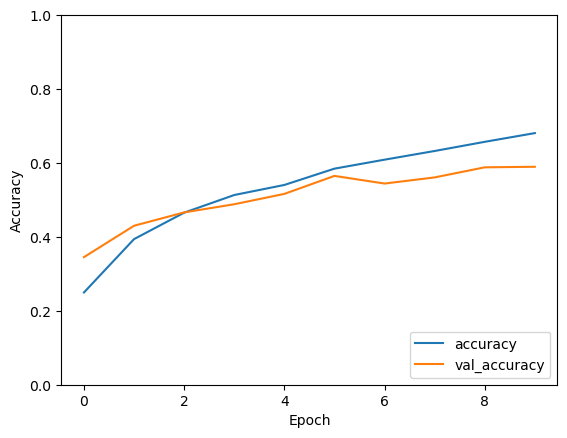

313/313 - 1s - loss: 1.1723 - accuracy: 0.5897 - 1s/epoch - 4ms/step
Accuracy for 100 classes: 0.5896999835968018


In [10]:
# Обучение модели на подмножестве данных
history_100_classes = model_100_classes.fit(subset_train_images, subset_train_labels, epochs=10, 
                                            validation_data=(subset_test_images, subset_test_labels))

# Визуализация результатов
plt.plot(history_100_classes.history['accuracy'], label='accuracy')
plt.plot(history_100_classes.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Оценка точности на тестовом подмножестве
test_loss_100, test_acc_100 = model_100_classes.evaluate(subset_test_images, subset_test_labels, verbose=2)
print("Accuracy for 100 classes:", test_acc_100)

# *Сравнение моделей на 10 и 100 классов*

In [12]:
# Выводим точность обеих моделей
print("Accuracy for 10 classes:", test_acc_10)
print("Accuracy for 100 classes:", test_acc_100)

Accuracy for 10 classes: 0.6092000007629395
Accuracy for 100 classes: 0.5896999835968018


# *Сохранение моделей*

In [24]:
# Сохраняем модели
#model_10_classes.save('model_10_classes.h5')
#model_100_classes.save('model_100_classes.h5')

In [25]:
# Сохраняем модели в рекомендованном формате
model_10_classes.save('model_10_classes.keras')
model_100_classes.save('model_100_classes.keras')

При сохранении обученных моделей машинного обучения я использовал современный формат .keras, рекомендованный TensorFlow и Keras, вместо устаревшего формата HDF5 (.h5). Этот шаг был предпринят по нескольким причинам:

Лучшая Совместимость: Формат .keras обеспечивает более гладкую интеграцию и совместимость с текущими и будущими версиями TensorFlow и Keras.

Полное Сохранение Модели: Формат .keras не только сохраняет архитектуру модели и ее веса, но также включает информацию о конфигурации обучения и состоянии оптимизатора, что важно для полного восстановления модели.

# Объяснение зависимостей в нейронной сети

## Зависимость от Количества Цветов:

### Входной Слой (Input Layer):

В сверточной нейронной сети для обработки цветных изображений входной слой должен учитывать количество цветовых каналов. Для цветных изображений в формате RGB используются 3 канала (красный, зеленый, синий). Таким образом, размерность входных данных модели будет [высота изображения, ширина изображения, 3].

### Сверточные Слои (Convolutional Layers):

В этих слоях размер фильтров должен соответствовать количеству цветовых каналов в изображении. Например, в первом сверточном слое фильтры могут иметь размер [3, 3, 3], где последняя цифра обозначает глубину фильтра, соответствующую количеству каналов.

## Зависимость от Количества Классов:

### Выходной Слой (Output Layer):

В задачах классификации выходной слой нейронной сети напрямую зависит от количества классов, на которые модель должна классифицировать данные. Для классификации на 10 классов, например, в выходном слое должно быть 10 нейронов, каждый из которых представляет вероятность принадлежности входного изображения к одному из классов. Аналогично, для 100 классов в выходном слое будет 100 нейронов.

Это объяснение поможет вам понять, как различные элементы нейронной сети изменяются в зависимости от характеристик входных данных (как цветовых каналов, так и количества классов для классификации). Вы можете адаптировать этот текст с учетом конкретных деталей вашей реализации и включить его в свой проект.


In [26]:
from tensorflow.keras import datasets, layers, models

# Загрузка и подготовка данных CIFAR-10 (если это еще не сделано)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Создание модели
model = models.Sequential()
# Слой 1: Сверточный слой
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Слой 2: Слой пулинга
model.add(layers.MaxPooling2D((2, 2)))
# Слой 3: Еще один сверточный слой
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Слой 4: Выравнивание данных перед полносвязным слоем
model.add(layers.Flatten())
# Слой 5: Полносвязный слой для классификации
model.add(layers.Dense(10))  # Для 10 классов

# Компиляция модели
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Подготовка меток
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

# Обучение модели
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3817 - accuracy: 0.5080
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0416 - accuracy: 0.6384
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9267 - accuracy: 0.6797
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8394 - accuracy: 0.7116
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7681 - accuracy: 0.7356
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7029 - accuracy: 0.7583
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6420 - accuracy: 0.7781
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5936 - accuracy: 0.7939
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5477 - accuracy: 0.8095
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - l

# Обучение модели и объяснение каждого слоя

## Сверточные Слои (Conv2D):

**Функция:** Эти слои используются для извлечения признаков из входных изображений. Сверточные слои применяют набор фильтров к изображению, создавая карты признаков, которые затем используются в последующих слоях сети.

**Выбор гиперпараметров:** Количество и размер фильтров в этих слоях определяются экспериментально. Больше фильтров может уловить больше признаков, но также увеличивает вычислительную сложность.

## Слои Пулинга (MaxPooling2D):

**Функция:** Слои пулинга уменьшают размерность карт признаков, позволяя сети быть более устойчивой к мелким изменениям во входных данных. Это также помогает уменьшить количество параметров и вычислительную сложность.

**Выбор гиперпараметров:** Размер фильтра пулинга обычно выбирается так, чтобы уменьшить размерность данных, сохраняя при этом важные признаки.

## Полносвязные Слои (Dense):

**Функция:** Эти слои используются для классификации на основе признаков, извлеченных сверточными и пулинг слоями. Они вычисляют веса, связывающие признаки с конкретными классами.

**Выбор гиперпараметров:** Количество нейронов в полносвязных слоях часто определяется экспериментально. Большее количество нейронов может улучшить способность сети к обучению, но также увеличивает риск переобучения.

## Обоснование Выбора Гиперпараметров

**Количество Эпох:** Количество эпох определяет, сколько раз сеть будет видеть весь обучающий набор данных. Выбор количества эпох зависит от размера набора данных и скорости сходимости обучения.

**Размер Пакета (Batch Size):** Определяет количество обучающих примеров, которые сеть видит перед обновлением весов. Большие пакеты могут ускорить обучение, но требуют больше памяти.

**Скорость Обучения (Learning Rate):** Одна из самых важных настроек, которая определяет величину обновлений весов в процессе обучения. Слишком большая скорость обучения может привести к нестабильности, а слишком маленькая - к медленной сходимости.


In [27]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.0872 - accuracy: 0.6710
Test Accuracy:  0.6710000038146973


In [28]:
model.save('my_cifar10_model.h5')